In [1]:
#Import important functions

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
pd.__version__

'0.23.4'

In [6]:
#Question 1: Data Description

#1. Load your dataset from the link that has been provided to you above
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
dataset = pd.read_csv(url, header = None)

In [7]:
#2. How many different types of attributes does the dataset contain?
print(dataset.shape[1])

#3. How many sample observations does the dataset contain for each attribute?
dataset.shape[0]

128


1994

In [9]:
#4. What is the mean, max, min value and standard deviation of the attribute values for each of the attribute categories in the dataset?
dataset.describe()

,0,4,5,6,7,8,9,10,11,12,...,96,97,98,99,100,118,119,120,125,127
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Question 2: Data Preprocessing

#1. Display the values of the attributes Category 1 and the User ID in a dataframe format. [5pts]
dataset[[3]]

,3
0,Lakewoodcity
1,Tukwilacity
2,Aberdeentown
3,Willingborotownship
4,Bethlehemtownship
5,SouthPasadenacity
6,Lincolntown
7,Selmacity
8,Hendersoncity
9,Claytoncity


In [14]:
#2. Does the dataset have any special characters as values? If it does then replace them with NaN and drop the values.
dataset = dataset.replace('?', np.nan)
dataset = dataset.dropna(axis=0, how="any")

In [16]:
#3. Scale the values of the last five category attributes using the sklearn min-max scaling function. Print out these values
df = pd.DataFrame(dataset)
df1 = df.groupby([3])
df1 = df1.cumsum()
minmax_scale = preprocessing.MinMaxScaler().fit_transform(df1)
print(minmax_scale)

[[0.58695652 0.         0.13265306 ... 0.83505155 0.88       0.47959184]
 [0.2173913  0.         0.09183673 ... 0.04123711 0.56       0.62244898]
 [0.91304348 0.         0.07142857 ... 0.16494845 0.6        0.29591837]
 ...
 [0.         1.         0.05102041 ... 0.1443299  0.62       0.05102041]
 [0.         1.         0.14285714 ... 0.15463918 0.91       0.21428571]
 [0.34782609 1.         0.06122449 ... 0.30927835 0.22       0.17346939]]


/usr/local/anaconda352/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<Figure size 432x288 with 0 Axes>

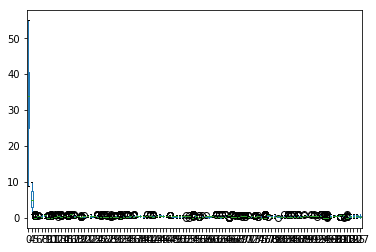

In [25]:
#Question 3: Data Visualization

#1. Plot the raw dataset in the form of a box plot.
plt.figure();
df1.plot.box();

<Figure size 432x288 with 0 Axes>

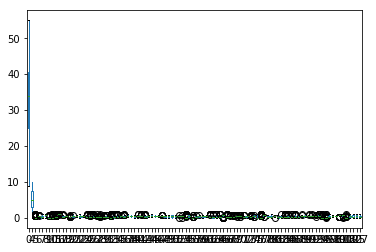

In [27]:
#2. Group the features by age of participants and plot the new dataframe.
df2 = df1.groupby([11, 12, 13, 14])
df2 = df2.cumsum()
plt.figure();
df2.plot.box();

<Figure size 432x288 with 0 Axes>

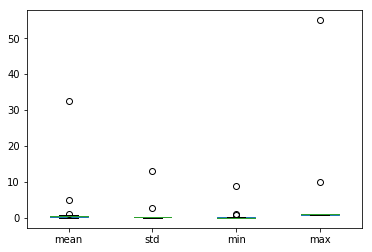

In [28]:
#3. Plot the mean, minimum, maximum, standard deviation values of each numerical attribute.

df3 = pd.DataFrame(dataset.describe())
df3_t = df3.T
df3_t = df3_t.groupby(['count', '25%', '50%', '75%'])
df3_t = df3_t.cumsum()
plt.figure();
df3_t.plot.box();